In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv('data/houses.csv')
df['a'] = zip(df.suburb, df.postcode)

def a(x):
    s, p = x
    return s + '-VIC-' + str(p)
    
l = df.a.map(a).unique()
l = [x.replace(' ', '-') for x in l]
l.remove('MELBOURNE-(3004)-VIC-3004')

len(l)

# Scraping

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup as Soup
import csv
import numpy as np

def getinfo(url):
    browser = webdriver.Chrome(executable_path="chromedriver/chromedriver")
    browser.get(url)
    
    try:
        # 1 bed unit
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[1]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _1bed_unit_median_price = s[0].text
        _1bed_unit_days = s[1].text
        _1bed_unit_clearance = s[2].text
        _1bed_unit_sold = s[3].text

        # 2 bed unit
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[2]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _2bed_unit_median_price = s[0].text
        _2bed_unit_days = s[1].text
        _2bed_unit_clearance = s[2].text
        _2bed_unit_sold = s[3].text

        # 3 bed unit
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[3]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _3bed_unit_median_price = s[0].text
        _3bed_unit_days = s[1].text
        _3bed_unit_clearance = s[2].text
        _3bed_unit_sold = s[3].text

        # 2 bed house
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[4]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _2bed_house_median_price = s[0].text
        _2bed_house_days = s[1].text
        _2bed_house_clearance = s[2].text
        _2bed_house_sold = s[3].text

        # 3 bed house
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[5]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _3bed_house_median_price = s[0].text
        _3bed_house_days = s[1].text
        _3bed_house_clearance = s[2].text
        _3bed_house_sold = s[3].text

        # 4 bed house
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/a").click()
        browser.find_element_by_xpath("//*[@id='market-data-buying']/div/header/div/ul/li[6]/a").click()
        s = browser.find_elements_by_class_name('hood-buying-stat')
        _4bed_house_median_price = s[0].text
        _4bed_house_days = s[1].text
        _4bed_house_clearance = s[2].text
        _4bed_house_sold = s[3].text
    except:
        _1bed_unit_median_price = np.nan
        _1bed_unit_days = np.nan
        _1bed_unit_clearance = np.nan
        _1bed_unit_sold = np.nan
        
        _2bed_unit_median_price = np.nan
        _2bed_unit_days = np.nan
        _2bed_unit_clearance = np.nan
        _2bed_unit_sold = np.nan
        
        _3bed_unit_median_price = np.nan
        _3bed_unit_days = np.nan
        _3bed_unit_clearance = np.nan
        _3bed_unit_sold = np.nan
        
        _2bed_house_median_price = np.nan
        _2bed_house_days = np.nan
        _2bed_house_clearance = np.nan
        _2bed_house_sold = np.nan
        
        _3bed_house_median_price = np.nan
        _3bed_house_days = np.nan
        _3bed_house_clearance = np.nan
        _3bed_house_sold = np.nan
        
        _4bed_house_median_price = np.nan
        _4bed_house_days = np.nan
        _4bed_house_clearance = np.nan
        _4bed_house_sold = np.nan

    html = browser.page_source
    soup = Soup(html, 'lxml')

    # close browser
    browser.quit()

    name = soup.find('header', class_='hood-location-header').text
    
    try:
        travel2csb = soup.find('p', id='travelTrain').text
    except:
        travel2csb = np.nan

    chart = soup.find_all('div', class_='demographics-chart-data')
    
    try:
        age = chart[0].text
    except:
        age = np.nan
        
    try:
        dependency = chart[1].text
        dependency_family = dependency.split()[0]
        dependency_single = dependency.split()[1]
    except:
        dependency_family = np.nan
        dependency_single = np.nan
        
    try:
        occupation1 = soup.find_all('span', class_='bar-label')[0].text
        occupation2 = soup.find_all('span', class_='bar-label')[1].text
        occupation3 = soup.find_all('span', class_='bar-label')[2].text
    except:
        occupation1 = np.nan
        occupation2 = np.nan
        occupation3 = np.nan
        
    try:
        fullyowned = chart[3].text.split()[0]
        purchasing = chart[3].text.split()[1]
        renting = chart[3].text.split()[2]
    except:
        fullyowned = np.nan
        purchasing = np.nan
        renting = np.nan

    school = soup.find_all('div', class_='school-catchment__school-title-and-tags-container')
    numberofschool = len(school)

    result = [name, travel2csb, age, dependency_family, dependency_single,
              occupation1, occupation2, occupation3, fullyowned, purchasing,
              renting, numberofschool, 
              _1bed_unit_median_price, _1bed_unit_days, _1bed_unit_clearance, _1bed_unit_sold,
              _2bed_unit_median_price, _2bed_unit_days, _2bed_unit_clearance, _2bed_unit_sold,
              _3bed_unit_median_price, _3bed_unit_days, _3bed_unit_clearance, _3bed_unit_sold,
              _2bed_house_median_price, _2bed_house_days, _2bed_house_clearance, _2bed_house_sold,
              _3bed_house_median_price, _3bed_house_days, _3bed_house_clearance, _3bed_house_sold,
              _4bed_house_median_price, _4bed_house_days, _4bed_house_clearance, _4bed_house_sold]
    return result

base_url = 'https://www.domain.com.au/suburb-profile/'

columns = ['suburbname', 'travel2csb', 'age', 'dependency_family', 'dependency_single',
              'occupation1', 'occupation2', 'occupation3', 'fullyowned', 'purchasing',
              'renting', 'numberofschool', 
              '_1bed_unit_median_price', '_1bed_unit_days', '_1bed_unit_clearance', '_1bed_unit_sold',
              '_2bed_unit_median_price', '_2bed_unit_days', '_2bed_unit_clearance', '_2bed_unit_sold',
              '_3bed_unit_median_price', '_3bed_unit_days', '_3bed_unit_clearance', '_3bed_unit_sold',
              '_2bed_house_median_price', '_2bed_house_days', '_2bed_house_clearance', '_2bed_house_sold',
              '_3bed_house_median_price', '_3bed_house_days', '_3bed_house_clearance', '_3bed_house_sold',
              '_4bed_house_median_price', '_4bed_house_days', '_4bed_house_clearance', '_4bed_house_sold']

with open('subur.csv','wb') as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        writer.writerow(columns)
        
        for i in l:
            url = base_url + i
            print url
            writer.writerow(getinfo(url))
            


# Cleaning

In [ ]:
d = pd.read_csv('data/subur.csv')

In [ ]:
def splitnamepost(x):
    s = x.split('\n')
    return s[1]

d['name'] = d.suburbname.map(splitnamepost)

def splitnamepost(x):
    s = x.split('\n')
    p = s[2].split(', ')[1]
    return p

d['post'] = d.suburbname.map(splitnamepost)

d.drop('suburbname', axis=1, inplace=True)

In [ ]:
def getage(x):
    try:
        s = x.split('\n')
        return s[1]
    except:
        return np.nan

d.age = d.age.map(getage)

In [ ]:
# need to be fixed
def extrainfo(x):
    try:
        re = x.split('\n')[1]
        if re == '-':
            return np.nan
        else:
            return re
    except:
        return np.nan

d.iloc[:, 11:-2] = d.iloc[:, 11:-2].applymap(extrainfo)

In [ ]:
d.iloc[:, 10:-2] = d.iloc[:, 10:-2].fillna(0)

def ton(x):
    if x == 0:
        return np.nan
    else:
        x = x.replace('$', '')
        if 'k' in x:
            return float(x.replace('k', '')) * 1000
        if 'm' in x:
            return float(x.replace('m', '')) * 1000000
        else:
            return x

d.iloc[:, 11:-2] = d.iloc[:, 11:-2].applymap(ton)

In [ ]:
d.to_csv('suburb.csv', index=False)

# EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 200)

df = pd.read_csv('data/suburb.csv')

s = df[~df.age.isnull()]
mask = s._2bed_house_median_price.isnull() & \
        s._2bed_unit_median_price.isnull() & \
        s._3bed_house_median_price.isnull() & \
        s._3bed_unit_median_price.isnull()
u = s[~mask]

u.drop(['_1bed_unit_median_price', '_1bed_unit_days', '_1bed_unit_clearance', '_1bed_unit_sold',
        '_4bed_house_median_price', '_4bed_house_days', '_4bed_house_clearance', '_4bed_house_sold'],
       axis=1, inplace=True)
ff = u[~(u.age == '5 - 19')]

ff._2bed_house_clearance = ff._2bed_house_clearance.str.replace('%','').astype(float) / 100
ff._2bed_unit_clearance = ff._2bed_unit_clearance.str.replace('%','').astype(float) / 100
ff._3bed_house_clearance = ff._3bed_house_clearance.str.replace('%','').astype(float) / 100
ff._3bed_unit_clearance = ff._3bed_unit_clearance.str.replace('%','').astype(float) / 100

ff = ff[~(ff.travel2csb == '--')]
ff = ff[~ff.travel2csb.isnull()]

def h2m(x):
    s = x.split()
    if len(s) == 2:
        return int(s[0])
    elif len(s) == 4:
        t = int(s[0]) *60 + int(s[2])
        if t > 120:
            return np.nan
        else:
            return t

ff.travel2csb = ff.travel2csb.map(h2m)
ff = ff[~ff.travel2csb.isnull()]

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [4]:
ff.shape

(403, 29)

In [5]:
ff.columns = ['time2cbd','avgage','family','single','occupation1','occupation2','occupation3',
 'fullyowned','purchasing','renting','school',
 '_2bed_unit_median_price','_2bed_unit_days','_2bed_unit_clearance','_2bed_unit_sold',
 '_3bed_unit_median_price','_3bed_unit_days','_3bed_unit_clearance','_3bed_unit_sold',
 '_2bed_house_median_price','_2bed_house_days','_2bed_house_clearance','_2bed_house_sold',
 '_3bed_house_median_price','_3bed_house_days','_3bed_house_clearance','_3bed_house_sold',
 'suburb', 'post']

In [6]:
ff = ff[['suburb', 'post','occupation1','occupation2','occupation3','time2cbd','avgage','family','single',
 'fullyowned','purchasing','renting','school',
 '_2bed_unit_median_price','_2bed_unit_days','_2bed_unit_clearance','_2bed_unit_sold',
 '_3bed_unit_median_price','_3bed_unit_days','_3bed_unit_clearance','_3bed_unit_sold',
 '_2bed_house_median_price','_2bed_house_days','_2bed_house_clearance','_2bed_house_sold',
 '_3bed_house_median_price','_3bed_house_days','_3bed_house_clearance','_3bed_house_sold']]

In [7]:
ff.drop(['single', 'fullyowned'], axis=1, inplace=True)

In [8]:
price = ff[['_2bed_unit_median_price','_3bed_unit_median_price',
            '_2bed_house_median_price','_3bed_house_median_price',
            'avgage']]
# ,'family','fullyowned', 'renting','school'

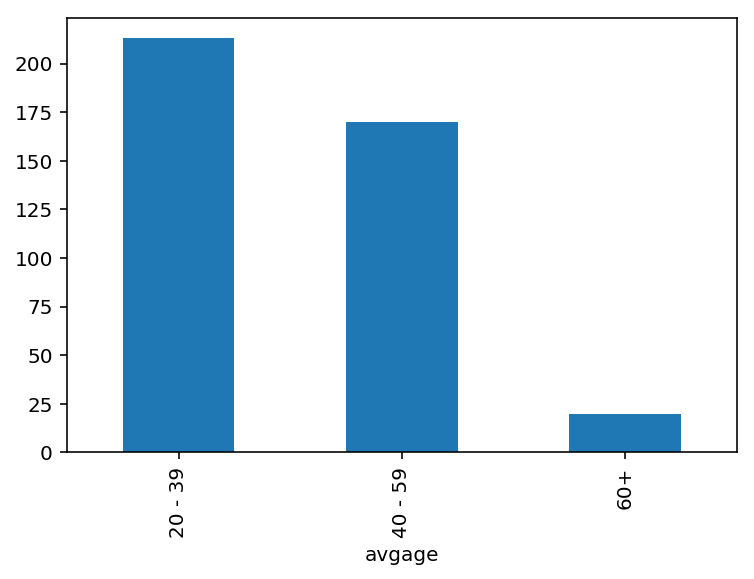

In [12]:
ff.groupby(by='avgage').count()['suburb'].plot(kind='bar')

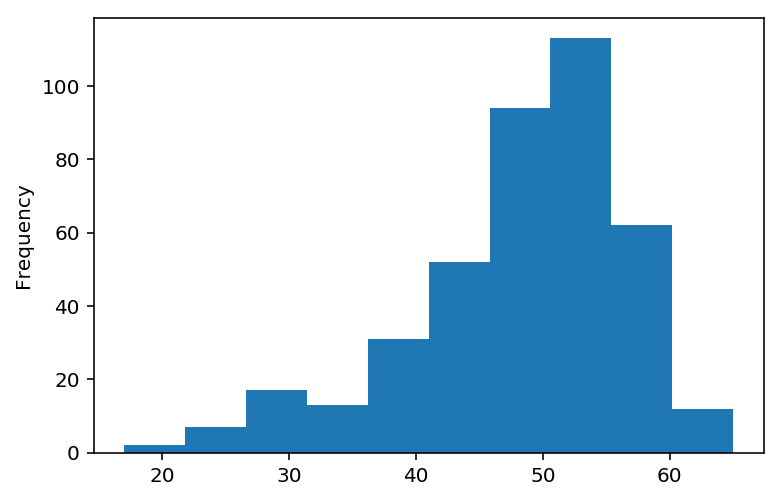

In [10]:
ff.family.plot(kind='hist')

In [ ]:
ff.purchasing.plot(kind='hist')

In [ ]:
ff.time2cbd.plot(kind='hist')

In [ ]:
mask = (ff.avgage == '20 - 39') & (ff.purchasing >= 30) & (ff.purchasing <= 50) & (ff.school == 3) & (ff.time2cbd < 45)
choose = ff[mask] 

In [ ]:
ff.school.plot(kind='hist')

In [ ]:
price._3bed_house_median_price.plot(kind='hist')

In [ ]:
sns.pairplot(price.dropna(), kind='reg')

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(ff.iloc[:,5:].corr())

In [ ]:
ff.dependency_family.plot(kind='hist')

In [ ]:
#sns.distplot(ff.dependency_family)
sns.distplot([1,2,3])

In [ ]:
sns.distplot(ff.renting)

In [ ]:
test1 = ff[['renting', 'fullyowned', 'purchasing', 'age']]

import random
random.seed(42)

def age(x):
    if x == '20 - 39':
        return random.randint(20,40)
    elif x == '40 - 59':
        return random.randint(40,60)
    else:
        return random.randint(60,80)

test1.age = test1.age.map(age)

sns.jointplot('age','renting', data=test1, kind='reg')

In [ ]:
choose.suburb

---

In [13]:
ff['name'] = ff.suburb
ff.iloc[0,0] = 'Melbourne (3000)'

In [16]:
ff.suburb

0         Melbourne (3000)
1           East Melbourne
2           West Melbourne
4                Southbank
6                Docklands
7                Footscray
8                   Seddon
9               Kingsville
10                Brooklyn
11               Maidstone
12          West Footscray
13              Yarraville
14                 Newport
15        South Kingsville
16               Spotswood
17            Williamstown
18      Williamstown North
48               Lyndhurst
49                Lynbrook
50            Hampton Park
51           Botanic Ridge
52              Cranbourne
53         Cranbourne West
56        Cranbourne North
57        Junction Village
58               Sandhurst
59                    Skye
60         Cranbourne East
62                   Clyde
63             Clyde North
               ...        
1449           Ferny Creek
1453              Kallista
1454             The Patch
1455               Monbulk
1457          Mount Evelyn
1460        Yarra Junction
1

In [15]:
import folium, os

state_geo = os.path.join('data', 'mel.geojson')

state_data = ff

m = folium.Map(location=[-37.817341, 145.033777], zoom_start=11)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['suburb', '_2bed_house_median_price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Price ($)',
)


folium.LayerControl().add_to(m)

m